-0.10696128929999998
1.8112778776168752
Optimization terminated successfully.
         Current function value: 0.130449
         Iterations 9
-0.071026067
1.8051120176568853
Optimization terminated successfully.
         Current function value: 0.126746
         Iterations 10
-0.03084492149999999
1.8141874480412956
Optimization terminated successfully.
         Current function value: 0.126516
         Iterations 10
0.0025672379000000003
1.8067228419701993
Optimization terminated successfully.
         Current function value: 0.126327
         Iterations 10
-0.10339964210000004
1.8062347113171484
Optimization terminated successfully.
         Current function value: 0.168282
         Iterations 9
-0.0748995987
1.8142672373122783
Optimization terminated successfully.
         Current function value: 0.165214
         Iterations 9
-0.024544858799999982
1.809118126792932
Optimization terminated successfully.
         Current function value: 0.163127
         Iterations 9
0.005028747800000

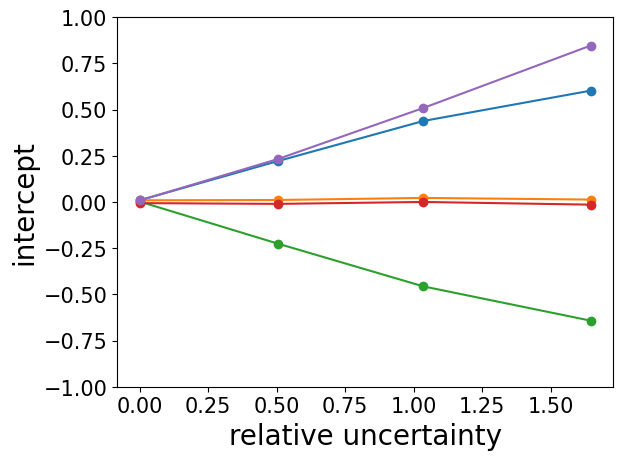

In [1]:

import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('default')
def standardization(data):
    data = np.array(data)
    mu = np.mean(data, axis=0)
    print(mu)
    sigma = np.std(data, axis=0)
    print(sigma)
    return (data ) / (sigma + 1e-9)


if __name__ == '__main__':
    r1_var_list = [7,6,5,4]
    TU = 8
    n = len(r1_var_list)
    modes = ['seeking','neu','averse','TS','UCB']

    for mode in modes:
        b_list = []
        b_std_list = []
        w_list = []
        w_std_list = []
        RU_list = []
        for (index,r1_var) in enumerate(r1_var_list):
            r1_std = np.sqrt(r1_var)
            r2_std = np.sqrt(TU - r1_var)
            RU = r1_std - r2_std
            RU_list.append(RU)
            if mode in ['seeking','neu','averse']:
                Data = pd.read_csv(f'saved/analysed_data_seek_init_std={r1_var}_TU={TU}_RS_5_5_'+mode+'.csv')
                Data = Data[(Data.trial > 10) & (Data.trial <= 20)]
            if mode == 'TS':
                Data = pd.read_csv(f'saved/TS_std={r1_var}_TU={TU}_1.csv')
                Data = Data[Data.trial > 1]
            if mode == 'UCB':
                Data = pd.read_csv(f'saved/UCB_std={r1_var}_TU={TU}_1.csv')
                Data = Data[Data.trial > 1]
            
            Data['choice'] = Data['choice'].astype(bool)
            Data['choice'] = ~Data['choice']
            C_list = Data['choice'].tolist()
            Y = C_list
            V_list = (Data['Q1']-Data['Q2']).tolist()
            V_list = standardization(V_list)
            X = np.array(V_list).T
            X = pd.DataFrame(X, columns=['V'])
            X = sm.add_constant(X)
            model = Probit(Y, X)
            probit_model = model.fit()
            const = probit_model.params['const']
            v = probit_model.params['V']
            std_const = probit_model.params['const'] - probit_model.conf_int()[0]['const']
            std_v = probit_model.params['V'] - probit_model.conf_int()[0]['V']
            b_list.append(const)
            w_list.append(v)
            b_std_list.append(std_const)
            w_std_list.append(std_v)
        plt.errorbar(RU_list, b_list,fmt="o-",elinewidth=2,capsize=4, label=mode)
    
    plt.xlabel('relative uncertainty',size=20)
    plt.ylabel('intercept',size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.ylim(-1.0,1.0)
    # plt.legend()
    plt.show()





